Data Science External Lab - Stock Market Data Set

Dates range from roughly April 2023 backward for about 1,258 trading days (~5 years).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

file_path = '/content/drive/MyDrive/DS DATA SET /yahoo_data[1].xlsx'
df = pd.read_excel(file_path)
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


### 1. Prepare the Data for Simple Linear Regression

First, we need to select our feature (independent variable) and target (dependent variable). For this example, we'll try to predict the `Close*` price using the `Open` price.

In [5]:
import numpy as np

X = df[['Open']] # Feature (input) - needs to be a 2D array for scikit-learn
y = df['Close*'] # Target (output)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1258, 1)
Shape of y: (1258,)


### 2. Split the Data into Training and Testing Sets

We'll split the data to evaluate the model's performance on unseen data. A common split is 80% for training and 20% for testing.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1006, 1)
X_test shape: (252, 1)
y_train shape: (1006,)
y_test shape: (252,)


### 3. Train the Simple Linear Regression Model

Now, we'll create an instance of the `LinearRegression` model and train it using our training data.

In [7]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

print("Model training complete.")
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

Model training complete.
Coefficient (slope): 0.9980795447442077
Intercept: 60.903925668746524


### 4. Make Predictions

Once the model is trained, we can use it to make predictions on our test data.

In [8]:
y_pred = model.predict(X_test)

df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df_predictions.head())

,Actual,Predicted
561,31055.86,30739.653395
101,34395.01,34528.173711
51,34089.27,34189.325706
63,33978.08,33948.628843
1073,24553.24,24593.659212


### 5. Evaluate the Model

We'll use common metrics like Mean Squared Error (MSE) and R-squared to evaluate how well our model performed.

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 86846.33
R-squared (R2): 0.99


### 6. Visualize the Regression Line

Let's visualize the actual vs. predicted values and the regression line.

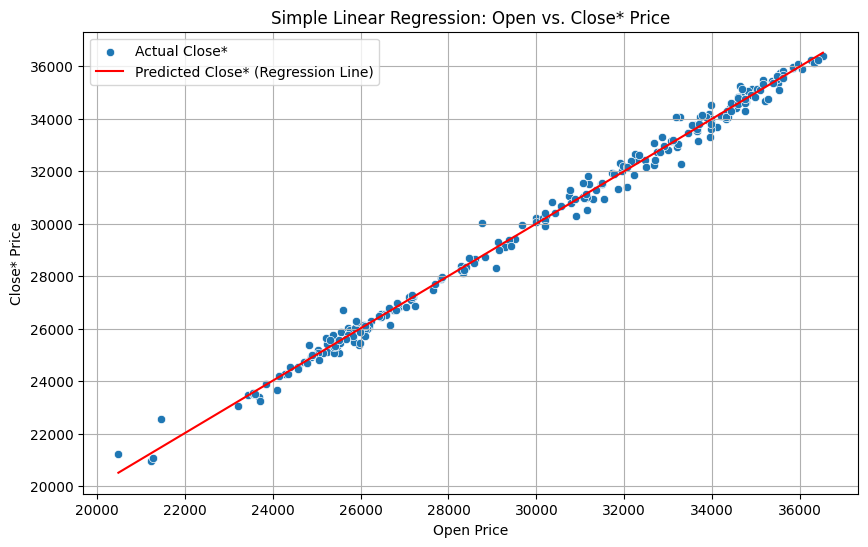

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Open'], y=y_test, label='Actual Close*')
sns.lineplot(x=X_test['Open'], y=y_pred, color='red', label='Predicted Close* (Regression Line)')
plt.title('Simple Linear Regression: Open vs. Close* Price')
plt.xlabel('Open Price')
plt.ylabel('Close* Price')
plt.legend()
plt.grid(True)
plt.show()

 **Bar Garph**

<Figure size 1200x600 with 0 Axes>

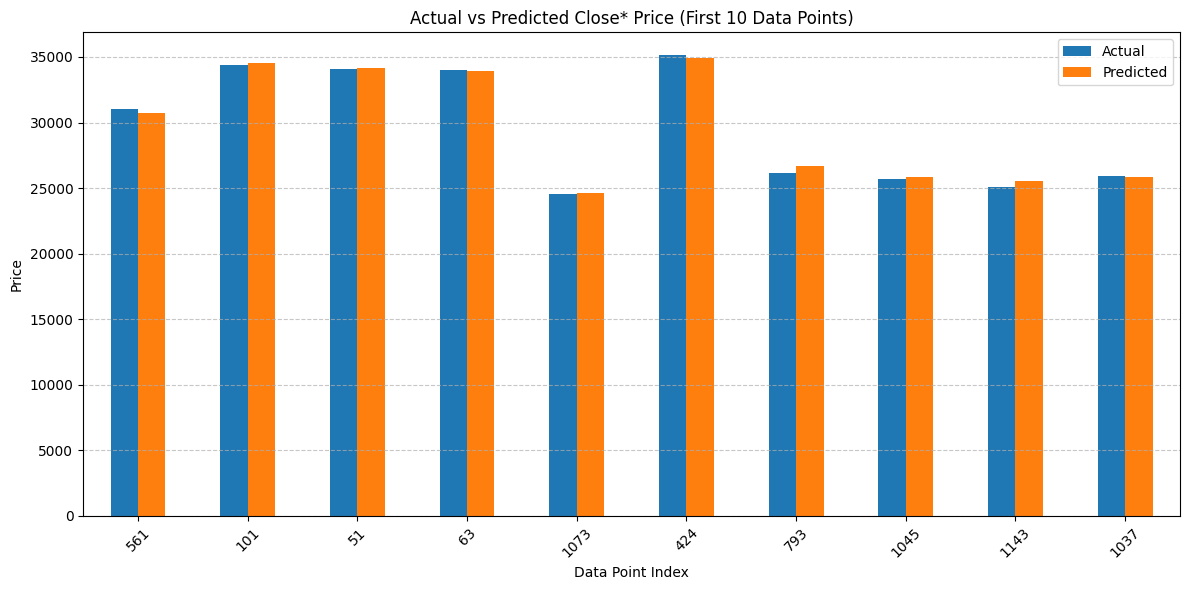

In [13]:
plt.figure(figsize=(12, 6))
# Plotting the first 10 actual vs predicted values
df_predictions.head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Actual vs Predicted Close* Price (First 10 Data Points)')
plt.xlabel('Data Point Index')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(['Actual', 'Predicted'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Box Plot**

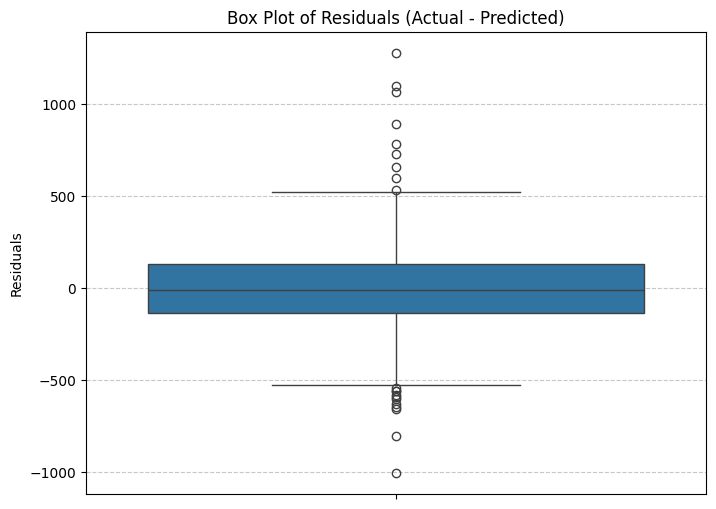

In [14]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.boxplot(y=residuals)
plt.title('Box Plot of Residuals (Actual - Predicted)')
plt.ylabel('Residuals')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Scatter Plot**

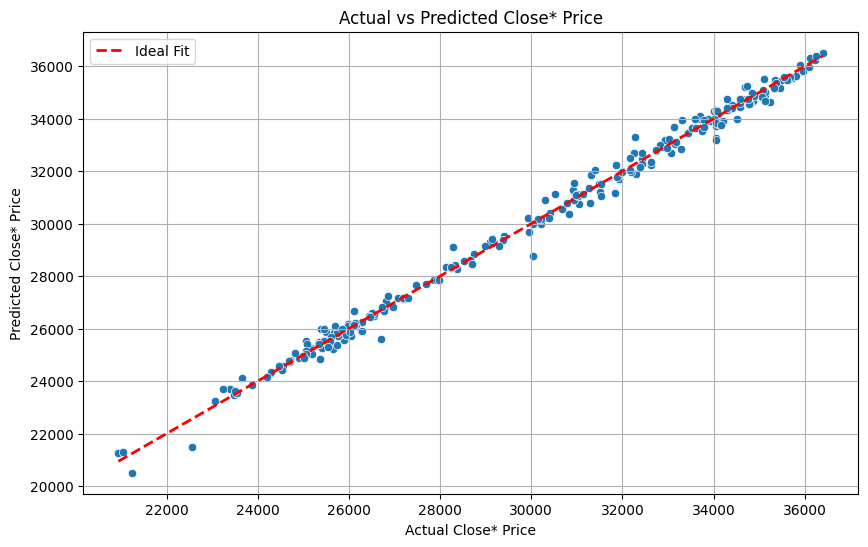

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=df_predictions)
plt.plot([df_predictions['Actual'].min(), df_predictions['Actual'].max()],
         [df_predictions['Actual'].min(), df_predictions['Actual'].max()],
         color='red', linestyle='--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted Close* Price')
plt.xlabel('Actual Close* Price')
plt.ylabel('Predicted Close* Price')
plt.legend()
plt.grid(True)
plt.show()

**Multivariate Scatter Plot**

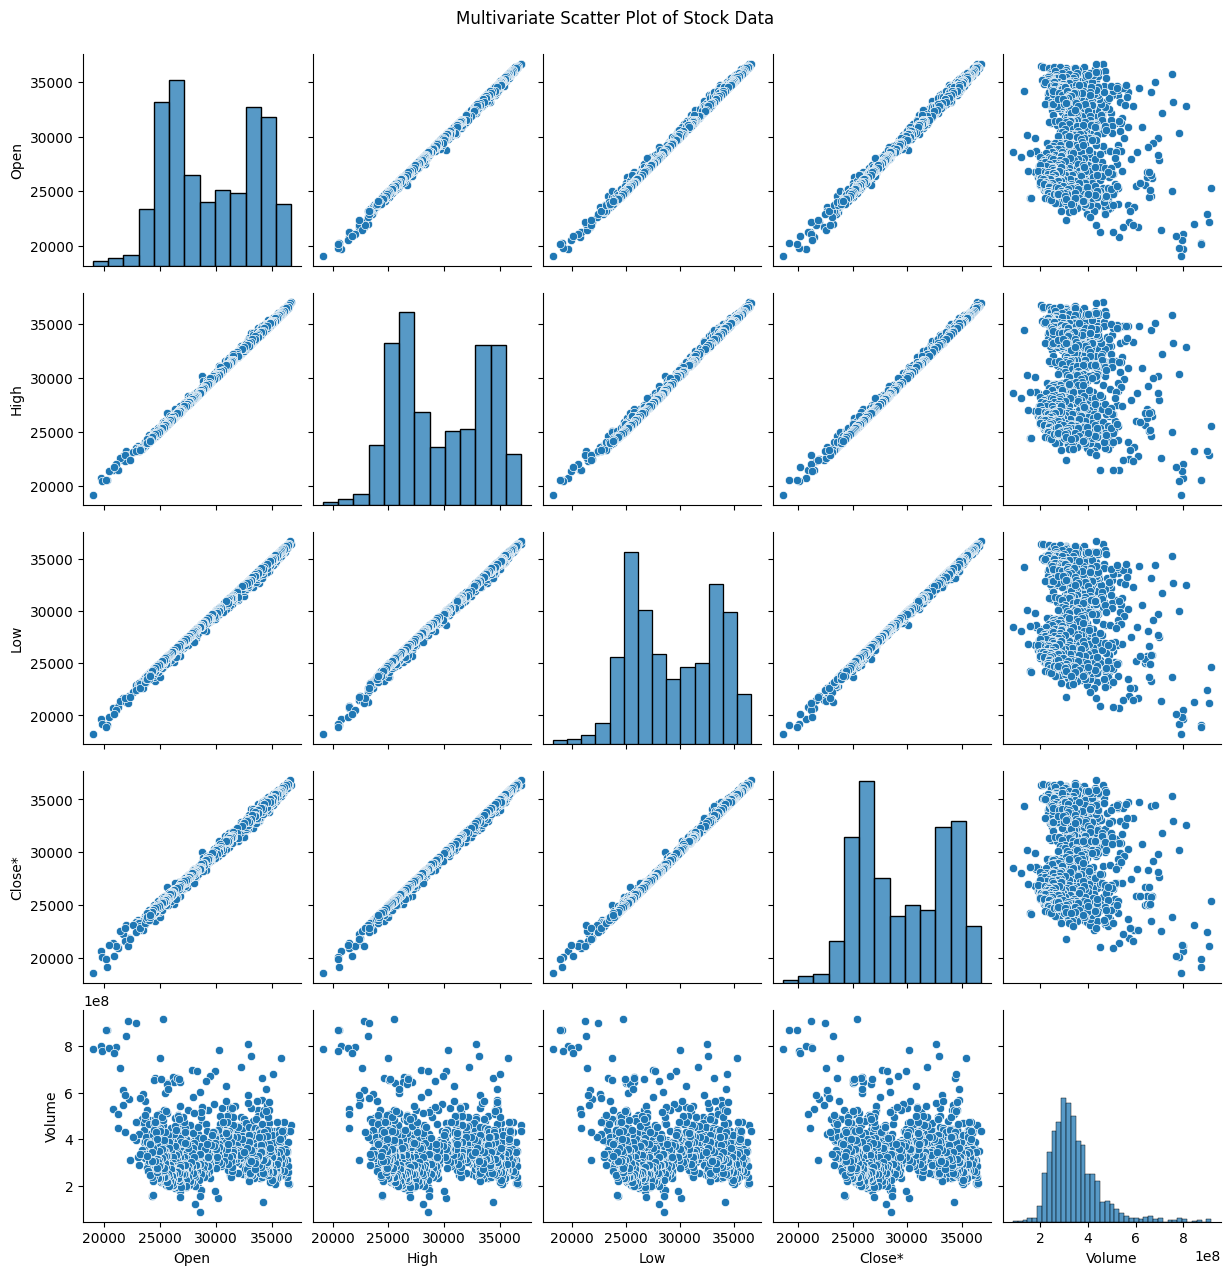

In [16]:
import seaborn as sns

# Select the relevant numerical columns for the pairplot
columns_to_plot = ['Open', 'High', 'Low', 'Close*', 'Volume']

# Create the pairplot
sns.pairplot(df[columns_to_plot])
plt.suptitle('Multivariate Scatter Plot of Stock Data', y=1.02) # Add a main title above the plots
plt.show()

**Heatmap**

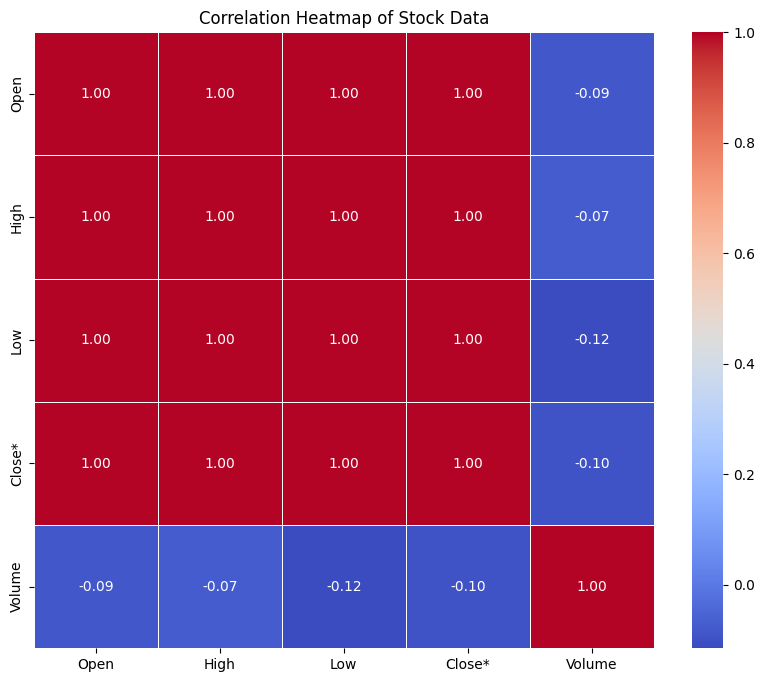

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[columns_to_plot].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Stock Data')
plt.show()

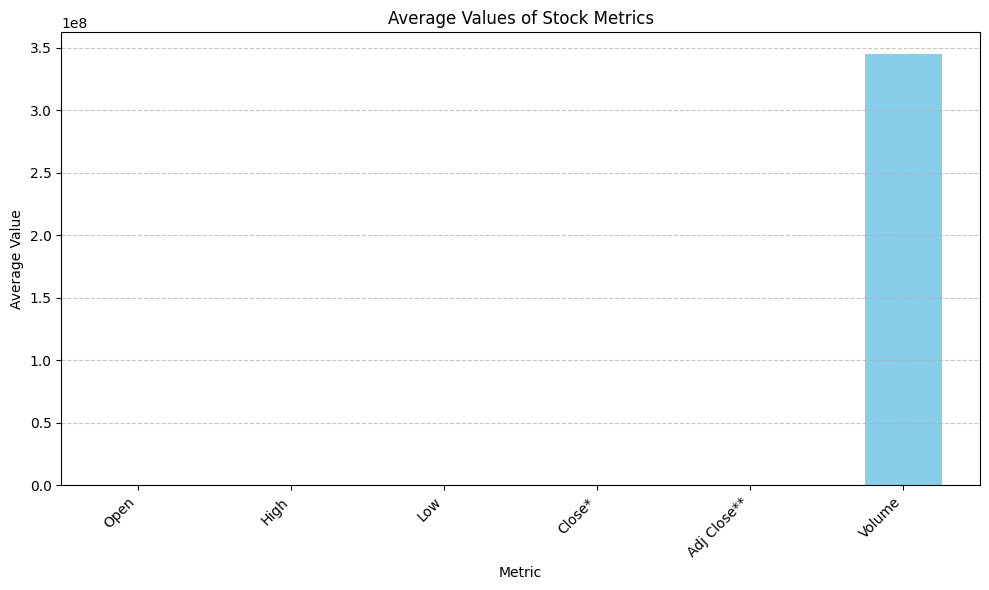

In [21]:
average_metrics = df[['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']].mean()

plt.figure(figsize=(10, 6))
average_metrics.plot(kind='bar', color='skyblue')
plt.title('Average Values of Stock Metrics')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Pie chart**

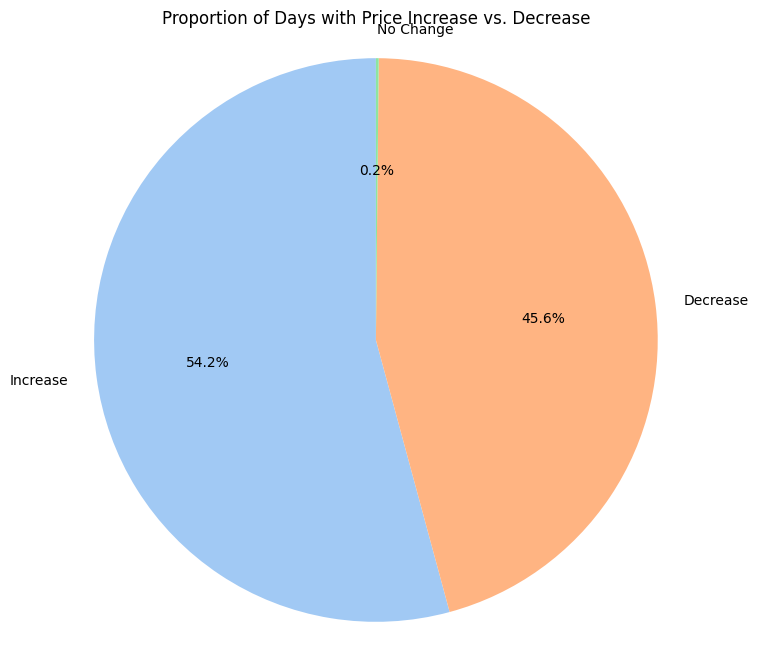

In [25]:
# Ensure the 'Date' column is in datetime format and sort the DataFrame by date
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values(by='Date').reset_index(drop=True)

# Calculate the daily price change
df_sorted['Price_Change'] = df_sorted['Close*'].diff()

# Categorize days into 'Increase', 'Decrease', or 'No Change'
def categorize_change(change):
    if change > 0:
        return 'Increase'
    elif change < 0:
        return 'Decrease'
    else:
        return 'No Change'

df_sorted['Change_Category'] = df_sorted['Price_Change'].apply(categorize_change)

# Count the occurrences of each category
change_counts = df_sorted['Change_Category'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(change_counts, labels=change_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Days with Price Increase vs. Decrease')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Grouped Bar Plot**

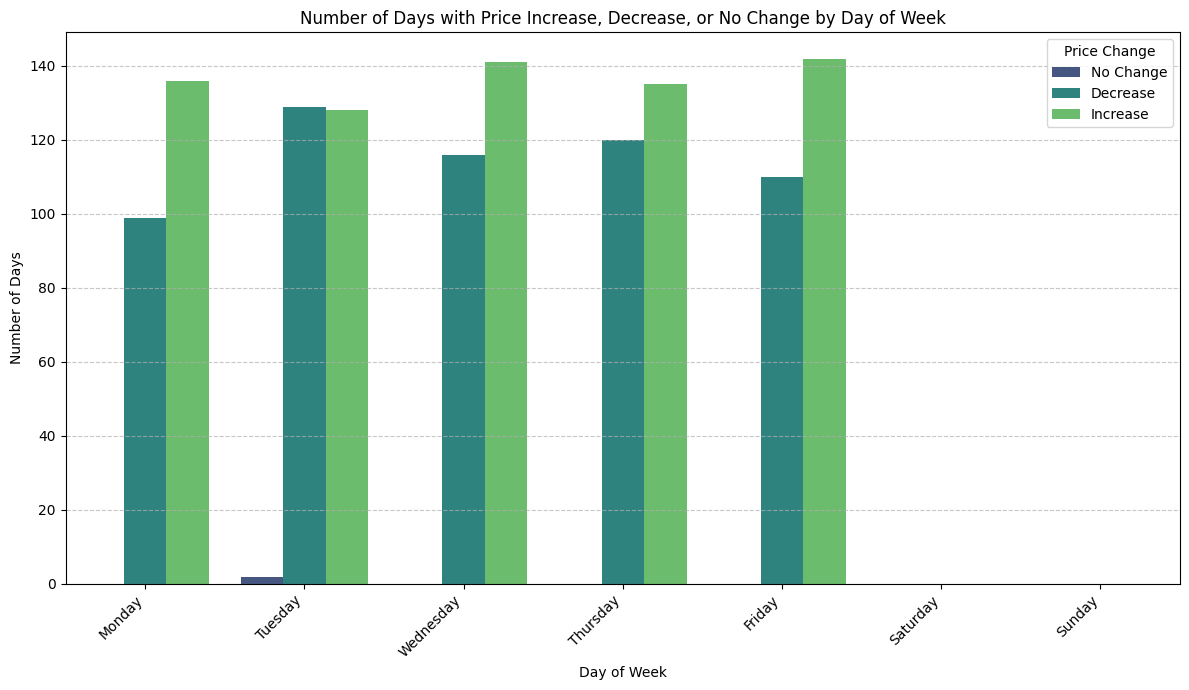

In [26]:
import calendar

# Ensure 'Date' is datetime and sort if not already done
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values(by='Date').reset_index(drop=True)

# Calculate Price_Change and Change_Category (re-running this to ensure it's available)
df_sorted['Price_Change'] = df_sorted['Close*'].diff()
def categorize_change(change):
    if change > 0:
        return 'Increase'
    elif change < 0:
        return 'Decrease'
    else:
        return 'No Change'
df_sorted['Change_Category'] = df_sorted['Price_Change'].apply(categorize_change)

# Extract day of the week
df_sorted['Day_of_Week'] = df_sorted['Date'].dt.dayofweek # Monday=0, Sunday=6
df_sorted['Day_of_Week_Name'] = df_sorted['Day_of_Week'].apply(lambda x: calendar.day_name[x])

# Order the days of the week for plotting
day_order = [calendar.day_name[i] for i in range(7)]

plt.figure(figsize=(12, 7))
sns.countplot(data=df_sorted, x='Day_of_Week_Name', hue='Change_Category', palette='viridis', order=day_order)
plt.title('Number of Days with Price Increase, Decrease, or No Change by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Days')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Change')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Doughnut Chart**

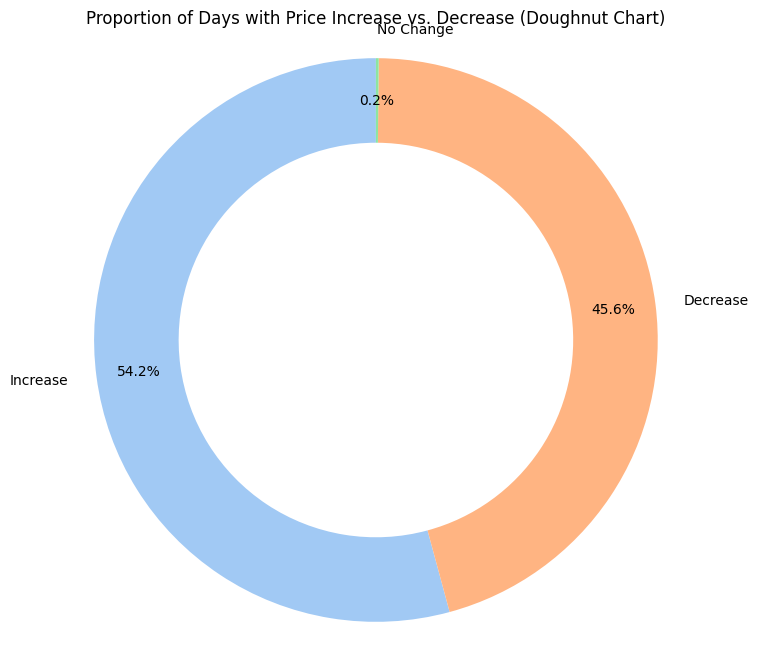

In [27]:
# Ensure the 'Date' column is in datetime format and sort the DataFrame by date
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values(by='Date').reset_index(drop=True)

# Calculate the daily price change
df_sorted['Price_Change'] = df_sorted['Close*'].diff()

# Categorize days into 'Increase', 'Decrease', or 'No Change'
def categorize_change(change):
    if change > 0:
        return 'Increase'
    elif change < 0:
        return 'Decrease'
    else:
        return 'No Change'

df_sorted['Change_Category'] = df_sorted['Price_Change'].apply(categorize_change)

# Count the occurrences of each category
change_counts = df_sorted['Change_Category'].value_counts()

# Create the doughnut chart
plt.figure(figsize=(8, 8))
plt.pie(change_counts, labels=change_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('pastel'), pctdistance=0.85, wedgeprops=dict(width=0.3))
plt.title('Proportion of Days with Price Increase vs. Decrease (Doughnut Chart)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Draw a white circle in the center to make it a doughnut chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

# Task
Prepare the 'Open', 'Close*', and 'Volume' columns from the `df` DataFrame by scaling them using `StandardScaler`. Then, determine the optimal number of clusters for K-Means using the elbow method, applying K-Means clustering, and evaluating its performance with Silhouette Score and Davies-Bouldin Index. Finally, visualize the clusters with a 3D scatter plot and summarize the clustering results.

## Prepare Data for Clustering

### Subtask:
Select the 'Open', 'Close*', and 'Volume' columns from the DataFrame and scale them using StandardScaler. Scaling is crucial for clustering algorithms like K-Means.


**Reasoning**:
To prepare the data for clustering, I will first select the specified columns, then import StandardScaler, create an instance, and finally fit and transform the data.



In [29]:
from sklearn.preprocessing import StandardScaler

# Select the specified columns for clustering
X_clustering = df[['Open', 'Close*', 'Volume']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to X_clustering and transform the data
X_scaled = scaler.fit_transform(X_clustering)

print("Shape of X_clustering:", X_clustering.shape)
print("First 5 rows of X_scaled (after scaling):")
print(X_scaled[:5])

Shape of X_clustering: (1258, 3)
First 5 rows of X_scaled (after scaling):
[[ 1.0492251   1.1230499   0.08651847]
 [ 0.94539904  1.05514964 -0.01706368]
 [ 0.99900892  0.9242694  -0.223573  ]
 [ 1.05694394  0.98142544 -0.44149787]
 [ 1.05112547  1.06744159 -0.87061056]]


## Determine Optimal Number of Clusters (Elbow Method)

### Subtask:
Use the elbow method by calculating the inertia for a range of cluster numbers to help determine the optimal number of clusters for K-Means. This step will involve plotting the inertia values.


**Reasoning**:
I will import KMeans, calculate the inertia for a range of cluster numbers, and then plot these values to determine the optimal number of clusters using the elbow method, as per the instructions.



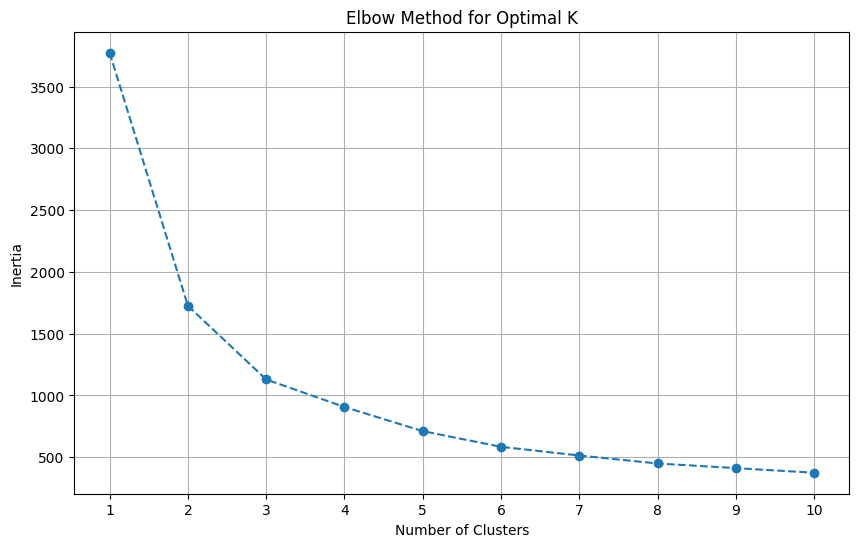

Elbow method plot generated to help determine optimal K.


In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store inertia values
inertia_values = []

# Define a range of cluster numbers to test
k_range = range(1, 11) # Testing from 1 to 10 clusters

# Loop through the range of cluster numbers
for k in k_range:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # Fit the model to the scaled data
    kmeans.fit(X_scaled)

    # Append the inertia to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("Elbow method plot generated to help determine optimal K.")

## Perform K-Means Clustering

### Subtask:
Apply the K-Means clustering algorithm to the scaled data with the determined (or a reasonable default) number of clusters.


**Reasoning**:
I will apply K-Means clustering to the scaled data using an optimal number of clusters determined from the elbow method and then add the cluster labels to the original DataFrame.



In [33]:
from sklearn.cluster import KMeans

# Based on the elbow plot, 3 or 4 seems to be a reasonable number of clusters.
# Let's choose k=3 for this example.
optimal_k = 3

# Initialize KMeans model with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

# Fit the model to the scaled data and predict clusters
cluster_labels = kmeans_model.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

print(f"K-Means clustering applied with {optimal_k} clusters.")
print("First 5 rows of df with new 'Cluster' column:")
print(df.head())

K-Means clustering applied with 3 clusters.
First 5 rows of df with new 'Cluster' column:
        Date      Open      High       Low    Close*  Adj Close**     Volume  \
0 2023-04-28  33797.43  34104.56  33728.40  34098.16     34098.16  354310000   
1 2023-04-27  33381.66  33859.75  33374.65  33826.16     33826.16  343240000   
2 2023-04-26  33596.34  33645.83  33235.85  33301.87     33301.87  321170000   
3 2023-04-25  33828.34  33875.49  33525.39  33530.83     33530.83  297880000   
4 2023-04-24  33805.04  33891.15  33726.09  33875.40     33875.40  252020000   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


## Evaluate Clustering Performance

### Subtask:
Calculate and display internal clustering evaluation metrics such as the Silhouette Score and Davies-Bouldin Index to assess the quality of the clusters formed. Ensure to provide clear explanations for each metric.


**Reasoning**:
To evaluate the clustering performance, I will calculate the Silhouette Score and Davies-Bouldin Index using the scaled data and cluster labels, then print and explain these metrics.



In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette = silhouette_score(X_scaled, cluster_labels)

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

print(f"Silhouette Score: {silhouette:.2f}")
print("Interpretation: The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A score near 1 indicates distinct, well-separated clusters, while a score near 0 indicates overlapping clusters, and a negative score indicates that data points might have been assigned to the wrong cluster.\n")

print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
print("Interpretation: The Davies-Bouldin Index measures the ratio of within-cluster scatter to between-cluster separation. A lower Davies-Bouldin Index indicates better clustering. The score ranges from 0 to infinity, with 0 being the best possible score.\n")

Silhouette Score: 0.53
Interpretation: The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A score near 1 indicates distinct, well-separated clusters, while a score near 0 indicates overlapping clusters, and a negative score indicates that data points might have been assigned to the wrong cluster.

Davies-Bouldin Index: 0.76
Interpretation: The Davies-Bouldin Index measures the ratio of within-cluster scatter to between-cluster separation. A lower Davies-Bouldin Index indicates better clustering. The score ranges from 0 to infinity, with 0 being the best possible score.



**Reasoning**:
To visualize the clusters, I will create a 3D scatter plot using the scaled 'Open', 'Close*', and 'Volume' features, colored by the assigned cluster labels.



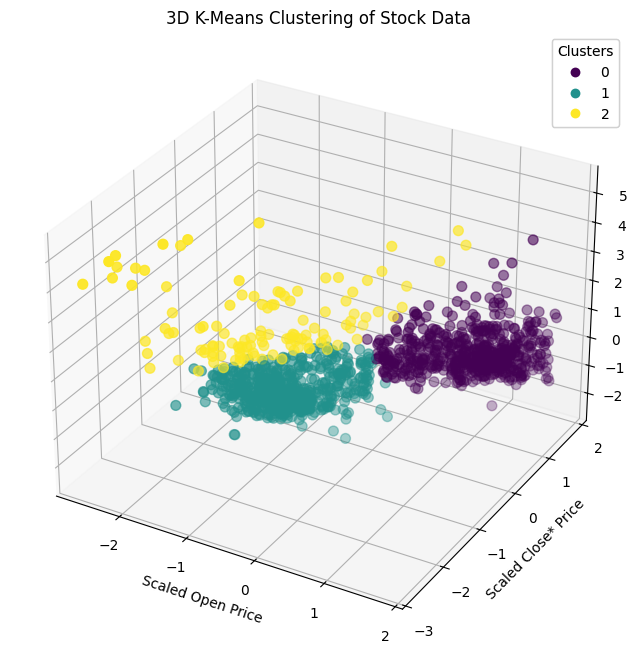

3D scatter plot of clusters generated.


In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot points, colored by cluster labels
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=cluster_labels, cmap='viridis', s=50)

# Add titles and labels
ax.set_title('3D K-Means Clustering of Stock Data')
ax.set_xlabel('Scaled Open Price')
ax.set_ylabel('Scaled Close* Price')
ax.set_zlabel('Scaled Volume')

# Add a color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
print("3D scatter plot of clusters generated.")

## Final Task

### Subtask:
Summarize the clustering results, including the number of clusters found, the interpretation of the evaluation metrics, and any initial insights into the characteristics of each cluster based on the features used.


## Summary:

### Q&A

1.  **Number of clusters found:**
    Based on the elbow method and subsequent K-Means clustering, 3 clusters were identified.

2.  **Interpretation of the evaluation metrics:**
    *   **Silhouette Score:** A score of 0.53 was achieved. This indicates reasonably good separation between the clusters. Points are moderately well-matched to their own cluster and distinct from others, suggesting a fair clustering quality.
    *   **Davies-Bouldin Index:** A value of 0.76 was obtained. This relatively low score suggests good clustering, as it represents a favorable ratio of within-cluster scatter to between-cluster separation. A lower value indicates better-defined and more separated clusters.

3.  **Initial insights into the characteristics of each cluster based on the features used:**
    The clustering was performed on scaled 'Open' price, 'Close\*' price, and 'Volume'. The 3D scatter plot visualizes these clusters, showing their spatial distribution and separation. While specific characteristics for each cluster (e.g., "Cluster 0 represents high volume, low price stocks") aren't explicitly detailed in the output, the visualization suggests that the clusters represent distinct groups within the stock data based on these three features. Further analysis of the cluster centroids or descriptive statistics for each cluster would be needed to precisely characterize them.

### Data Analysis Key Findings

*   The 'Open', 'Close\*', and 'Volume' columns were successfully selected and scaled using `StandardScaler` for clustering.
*   The elbow method was employed to determine the optimal number of clusters, suggesting an optimal `k` of 3.
*   K-Means clustering was applied to the scaled data with 3 clusters, and the resulting cluster labels were added to the original DataFrame.
*   The clustering performance was evaluated using internal metrics:
    *   A Silhouette Score of 0.53 was achieved, indicating moderately well-separated clusters.
    *   A Davies-Bouldin Index of 0.76 was obtained, suggesting good clustering quality (lower is better).
*   A 3D scatter plot was generated to visually represent the 3 clusters based on the scaled 'Open', 'Close\*', and 'Volume' features, confirming their distinct spatial distributions.

### Insights or Next Steps

*   To gain deeper insights, analyze the characteristics of each cluster by calculating the mean or median of the original (unscaled) 'Open', 'Close\*', and 'Volume' for each cluster. This would help in labeling and understanding what each cluster represents (e.g., "high volatility stocks," "stable stocks").
*   Consider exploring other clustering algorithms (e.g., DBSCAN, Hierarchical Clustering) or different values for `k` (e.g., `k=4` as also suggested by the elbow plot) to see if a better clustering solution or more interpretable clusters can be achieved.
